<a href="https://colab.research.google.com/github/georange7/Traffic-Sign-Recognition/blob/master/ts-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading GTSR Training and Testing Dataset from the official site

In [1]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2020-09-30 11:13:48--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M   179MB/s    in 1.5s    

2020-09-30 11:13:50 (179 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [2]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip


--2020-09-30 11:13:50--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99620 (97K) [application/zip]
Saving to: ‘GTSRB_Final_Test_GT.zip’

GTSRB_Final_Test_GT 100%[===================>]  97.29K  --.-KB/s    in 0.04s   

2020-09-30 11:13:50 (2.49 MB/s) - ‘GTSRB_Final_Test_GT.zip’ saved [99620/99620]

--2020-09-30 11:13:50--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[===================>]  84.86M   135MB/s    in 0.6s    

2020-09-

In [3]:
!unzip '/content/GTSRB_Final_Training_Images.zip' -d '/content/'
!unzip '/content/GTSRB_Final_Test_Images.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/GTSRB/Final_Test/Images/07633.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07634.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07635.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07636.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07637.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07638.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07639.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07640.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07641.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07642.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07643.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07644.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07645.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07646.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07647.ppm  
  inflating: /content/GTSRB/Final_Test/Images/07648.ppm  
  inflating: /content

In [4]:
!unzip '/content/GTSRB_Final_Test_GT.zip' -d '/content/GTSRB/Final_Test/Images/'

Archive:  /content/GTSRB_Final_Test_GT.zip
  inflating: /content/GTSRB/Final_Test/Images/GT-final_test.csv  


Importing necessary libraries

In [5]:
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
import random
import cv2
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPooling2D, Activation, Flatten, Dense, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage import transform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from skimage import transform
import tensorflow.keras.backend as K
tf.test.is_gpu_available()
tf.test.gpu_device_name()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


'/device:GPU:0'

Resizing Training and Testing Images.

In [6]:
def resize_cv(im,size):
    return cv2.resize(im, (size , size), interpolation = cv2.INTER_LINEAR)

Preprocessing Data: Training Images and Testing Images

In [7]:
im_size=32

data_dir = os.path.abspath('/content/GTSRB/Final_Training/Images')
os.path.exists(data_dir)
    
list_images = []
output = []
for dir in os.listdir(data_dir):
    if dir == '.DS_Store' :
        continue
    
    inner_dir = os.path.join(data_dir, dir)
    csv_file = pd.read_csv(os.path.join(inner_dir,"GT-" + dir + '.csv'), sep=';')
    for row in csv_file.iterrows() :
        img_path = os.path.join(inner_dir, row[1].Filename)
        img = plt.imread(img_path)
        img = img[row[1]['Roi.X1']:row[1]['Roi.X2'],row[1]['Roi.Y1']:row[1]['Roi.Y2'],:]
        img = resize_cv(img,im_size)
        list_images.append(img)
        output.append(row[1].ClassId)

In [8]:
def test_images(rootpath,size):
  test_images = []
  test_labels = []
  in_dir = '/content/GTSRB/Final_Test/Images/'
  csv_file = pd.read_csv(os.path.join(rootpath), sep=';')
  for row in csv_file.iterrows() :
    img_path = os.path.join(in_dir, row[1].Filename)
    img = plt.imread(img_path)
    img = img[row[1]['Roi.X1']:row[1]['Roi.X2'],row[1]['Roi.Y1']:row[1]['Roi.Y2'],:]
    img = resize_cv(img,size)
    test_images.append(img)
    test_labels.append(row[1].ClassId)

  return test_images, test_labels

Functions for CNN architectures. LeNet, Custom Model, MicroNet model

In [9]:
def LeNet(width, height, depth):
  model = keras.Sequential()
  model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(width,height,depth)))
  model.add(AveragePooling2D())
  model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
  model.add(AveragePooling2D())
  model.add(Flatten())
  model.add(Dense(units=120, activation='relu'))
  model.add(Dense(units=84, activation='relu'))
  model.add(Dense(units=43, activation = 'softmax'))
  model.summary()
  model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

  return model

In [10]:
def custom_model(width, height, depth):
  model = keras.Sequential()
  inputS = (height, width, depth)
  chanDim = -1
  model.add(Conv2D(8, (5, 5), padding="same",input_shape=inputS))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(16, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(Conv2D(16, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(43))
  model.add(Activation("softmax"))
  model.summary()
  model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
  return model

In [11]:
def MicronNet(width, height, depth):
  model = Sequential()
  model.add(Conv2D(filters=1, input_shape=(width,height,depth), kernel_size=(1,1),padding='same'))
  model.add(BatchNormalization(epsilon=1e-6))
  model.add(Activation("relu"))
  
  model.add(Conv2D(filters=29, kernel_size=(5,5)))
  model.add(BatchNormalization(epsilon=1e-6))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))

  model.add(Conv2D(filters=59, kernel_size=(3,3), padding='same'))
  model.add(BatchNormalization(epsilon=1e-6))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))

  model.add(Conv2D(filters=74, kernel_size=(3,3), padding='same'))
  model.add(BatchNormalization(epsilon=1e-6))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(300))
  model.add(BatchNormalization(epsilon=1e-6))
  model.add(Activation("relu"))
  model.add(Dense(300))
  model.add(Activation("relu"))
  model.add(Dense(43))
  model.add(Activation("softmax"))
  model.summary()
  model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
  return model

In [30]:
def visualizations(x_train,y_train, classes):
	W= 7
	L=10
	fig, axes = plt.subplots(L,W, figsize = (15,15))
	axes = axes.ravel()
	num_training = len(x_train)
	for i in np.arange(0,W*L):
		index=np.random.randint(0, num_training)
		axes[i].imshow(x_train[index])
		c = y_train[index]
		axes[i].set_title(classes[c], fontsize=9)
		axes[i].axis("off")
	plt.subplots_adjust(bottom= 0.001,top=0.9,hspace=0.8)
	fig = plt.figure(figsize=(12,6))

In [13]:
def samples_visuals(y_train,y_val,y_test):
  n, bins, patches = plt.hist(y_train, 43)
  plt.figure(figsize=(12,4))
  cls=['Training', 'Validation', 'Test']
  plt.title("Number of Train/Val/Test samples") 
  plt.xlabel("Labels")
  plt.ylabel("Samples")
  plt.hist([y_train,y_val,y_test], bins, stacked=True, label=cls)
  plt.show()


In [14]:
def evaluation_vis(History, string, epochs):
  N = np.arange(0, epochs)
  plt.style.use("ggplot")
  plt.figure(figsize = (8,8))
  plt.plot(N, History.history[string], label="train "+string)
  plt.plot(N, History.history["val_"+string], label="val "+ string)
  plt.title("Training and Validation " + string)
  plt.xlabel("Epoch")
  plt.ylabel("Loss/Val" + string)
  plt.legend(loc="lower left")

In [15]:
def conf_matrix(y_true, pr_class):
  cm = confusion_matrix(y_true, pr_class)
  plt.figure(figsize = (15,15))
  sns.heatmap(cm, annot=True)

In [44]:
def img_rec(x_test, pr_class, y_true, classes):
  fig,axes = plt.subplots(5,5,figsize=(13,13))
  axes = axes.ravel()
  for i in np.arange(0,25):
    axes[i].imshow(x_test[i])
    value_pr = pr_class[i]
    value_true = y_true[i]
    axes[i].set_title("Prediction = {}\n True={}".format(classes[value_pr], classes[value_true] ),fontsize=8)
    axes[i].axis("off")
  

In [17]:
def eval_metrics(yhat_classes,y_true):
  accuracy = accuracy_score(y_true, yhat_classes)
  print('Accuracy: %f' % accuracy)
  print(classification_report(y_true, yhat_classes))

Converting lists to arrays. Shuffle data spliting to training and validation data.

In [18]:
x = np.asarray(list_images)
y = np.asarray(output)
x, y = shuffle(x, y)

x_t, y_t = test_images('/content/GTSRB/Final_Test/Images/GT-final_test.csv',32)
x_test = np.asarray(x_t)
y_test = np.asarray(y_t)
print(x.shape)


(39209, 32, 32, 3)


In [19]:
split_size = int(x.shape[0]*0.75)
x_train, x_val= x[:split_size], x[split_size:]
y_train, y_val = y[:split_size], y[split_size:]

split_size = int(x.shape[0]*0.75)
x_train, x_val= x[:split_size], x[split_size:]
y_train, y_val = y[:split_size], y[split_size:]



In [20]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims = True)
x_val_gray = np.sum(x_val/3, axis=3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims = True)
x_train_gray = (x_train_gray-128)/128
x_val_gray = (x_val_gray-128)/128
x_test_gray = (x_test_gray-128)/128

Visualization of Training Dataset

Convert to grayscale and normalizing input data, for LeNet-5 model.

In [21]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

The class is : Priority road


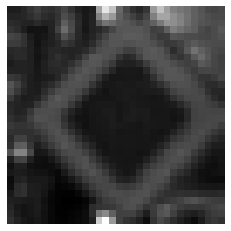

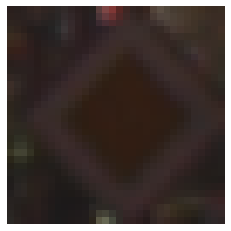

In [24]:
i = np.random.randint(1, len(x_train_gray))
plt.axis("off")
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.axis("off")
plt.imshow(x_train[i])
d = y_train[i]
print("The class is :", classes[d])

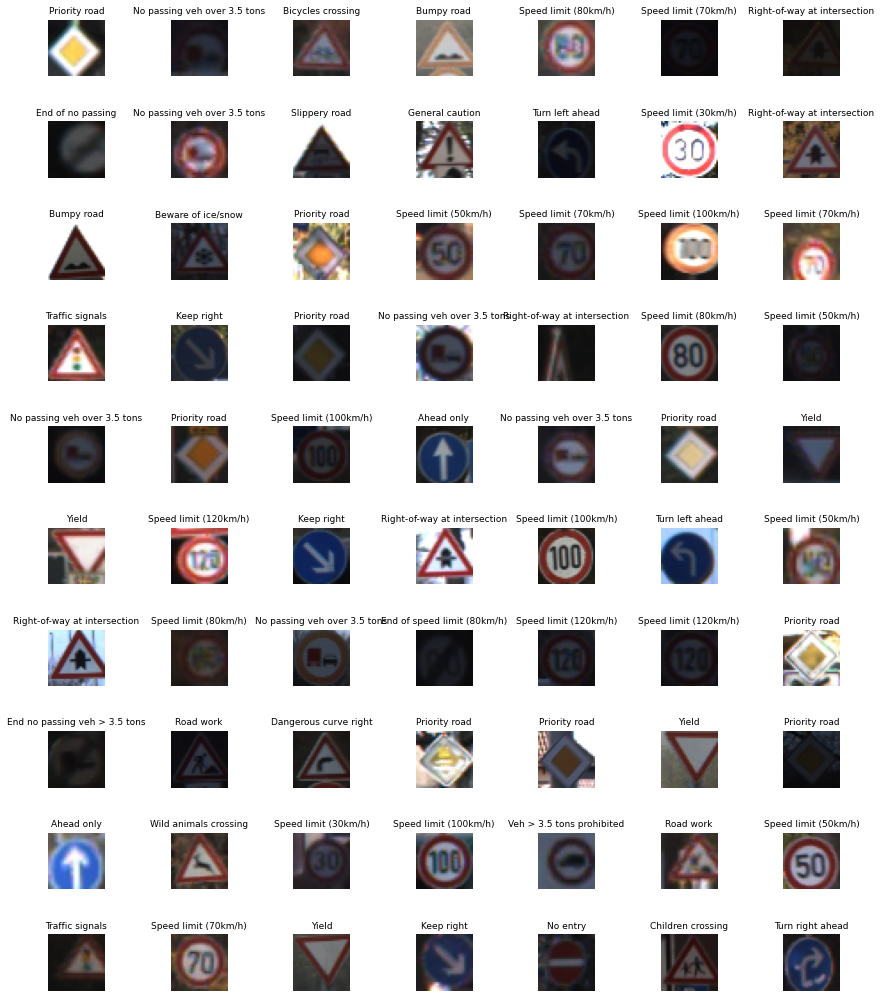

<Figure size 864x432 with 0 Axes>

In [31]:
visualizations(x_train, y_train, classes)

Samples per class of Training, Testing and Validation Data.

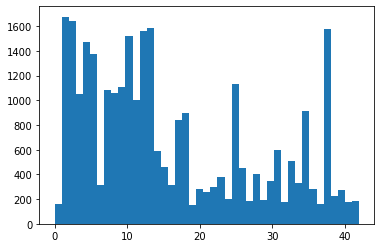

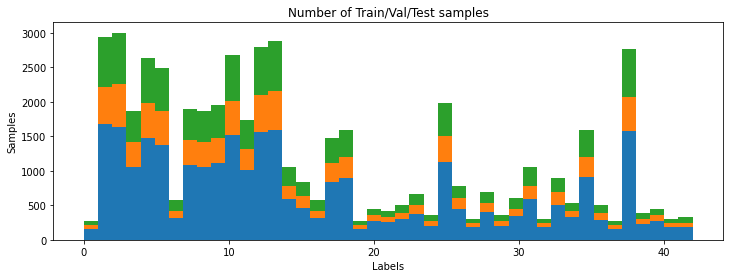

In [32]:
samples_visuals(y_train,y_val,y_test)

Training and visualization of LeNet model

In [33]:
eps = 40
model = LeNet(32,32,1)

History = model.fit(x_train_gray,
                    y_train,
                    batch_size=500,
                    epochs=eps,
                    verbose=1,
                    validation_data=(x_val_gray, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

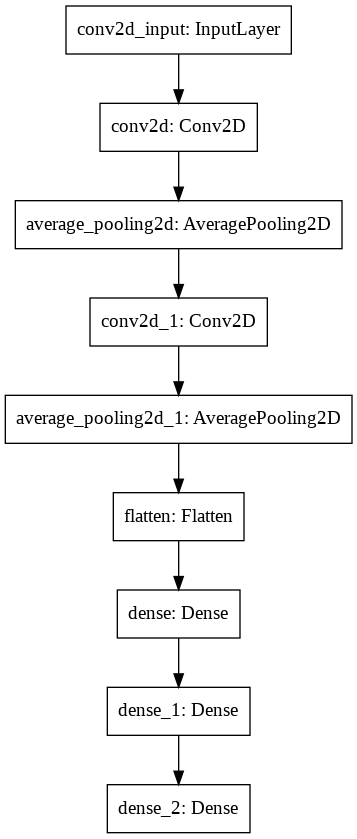

In [34]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",)

Model Evaluation

In [35]:
score = model.evaluate(x_test_gray, y_test, verbose=0)
print("Test Loss: {}".format(score[0]))
print("Test Accuracy: {}".format(score[1]))

Test Loss: 0.9992299675941467
Test Accuracy: 0.8684085607528687


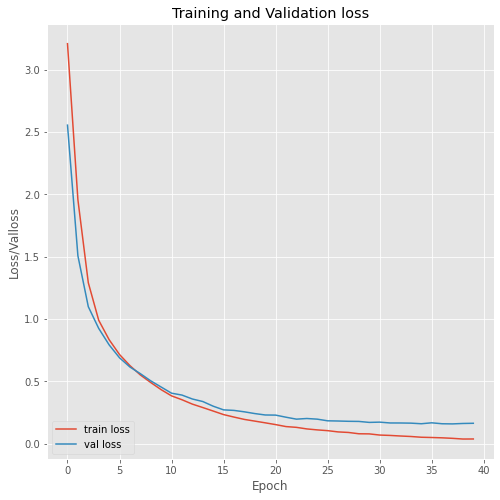

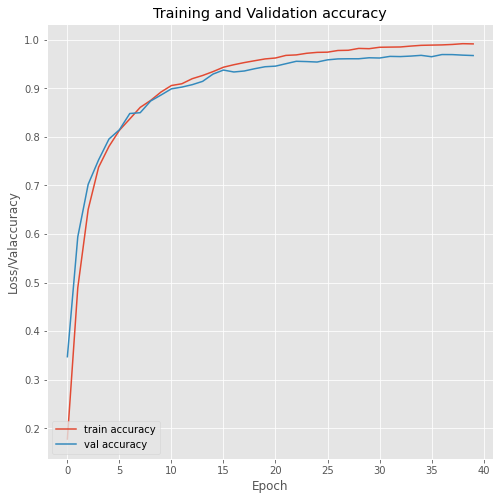

In [36]:
evaluation_vis(History, 'loss', eps)
evaluation_vis(History, 'accuracy',eps)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


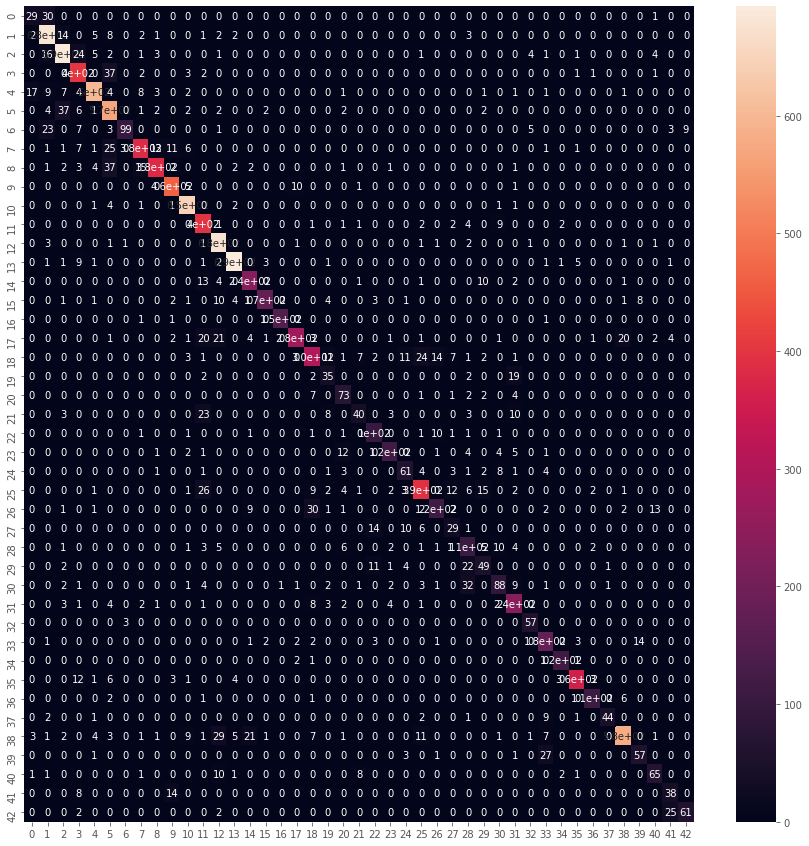

In [37]:
pr_class = model.predict_classes(x_test_gray)
conf_matrix(y_test, pr_class)

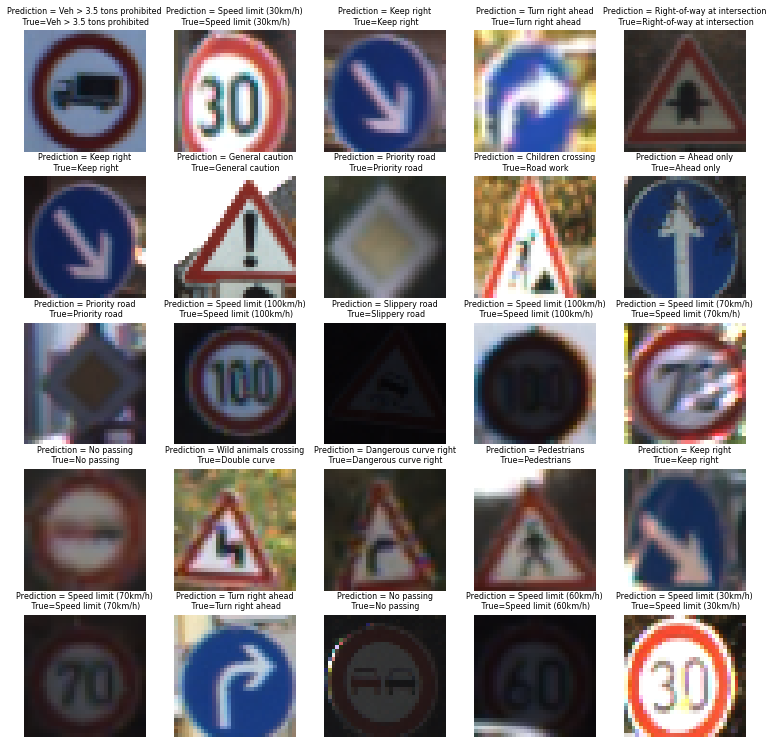

In [45]:
img_rec(x_test, pr_class, y_test, classes)

In [51]:
yhat_probs = model.predict(x_test_gray, verbose=0)
yhat_classes = model.predict_classes(x_test_gray, verbose=0)
eval_metrics(yhat_classes, y_test)

Accuracy: 0.868409
              precision    recall  f1-score   support

           0       0.56      0.48      0.52        60
           1       0.88      0.94      0.91       720
           2       0.90      0.92      0.91       750
           3       0.83      0.90      0.86       450
           4       0.96      0.91      0.93       660
           5       0.81      0.90      0.85       630
           6       0.96      0.66      0.78       150
           7       0.91      0.85      0.88       450
           8       0.94      0.84      0.89       450
           9       0.93      0.96      0.95       480
          10       0.94      0.98      0.96       660
          11       0.80      0.95      0.86       420
          12       0.88      0.98      0.93       690
          13       0.97      0.96      0.97       720
          14       0.86      0.88      0.87       270
          15       0.95      0.83      0.89       210
          16       0.99      0.98      0.99       150
        

Custom model training and visualization. Also trained on 50 epochs, as optimizer selected Adam and as loss function selected sparse_categorical_crossentropy.

In [52]:
print('Custom model training begins...')
eps= 80
model2 = custom_model(32, 32, 3)

History2 = model2.fit(x_train,
                    y_train,
                    batch_size=500,
                    epochs=eps,
                    verbose=1,
                    validation_data=(x_val, y_val))

Custom model training begins...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 8)         608       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_1 

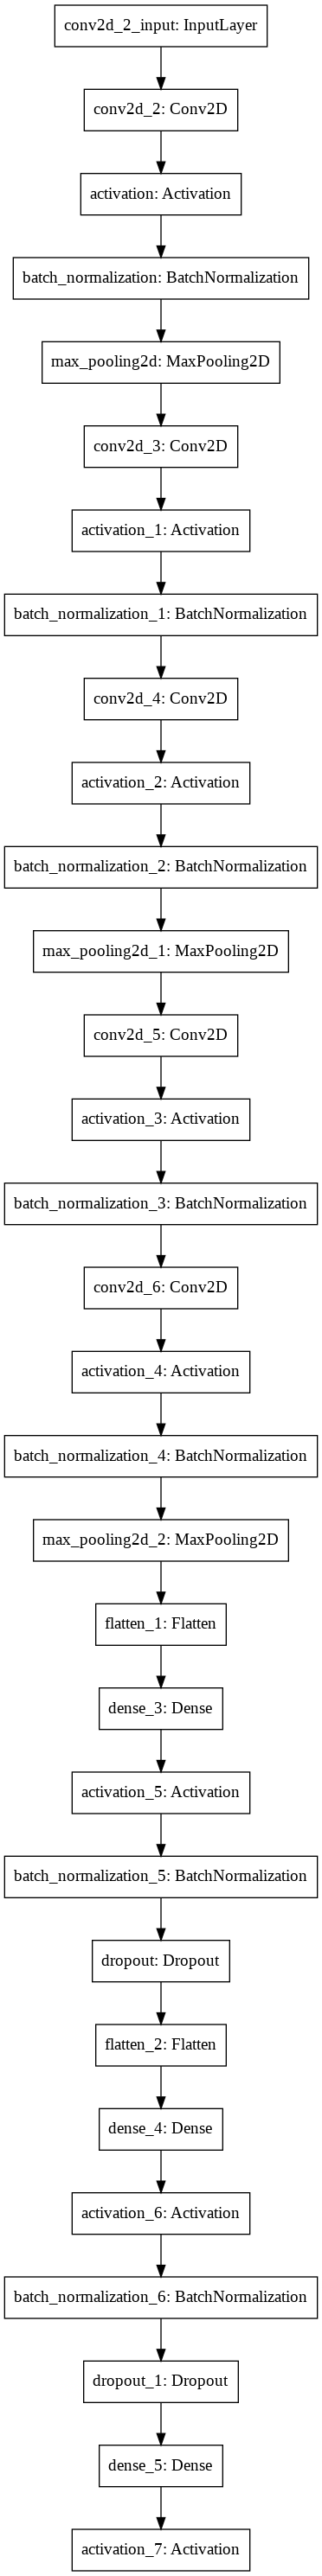

In [54]:
tf.keras.utils.plot_model(
    model2,
    to_file="model2.png")

Custom Model Evaluation. Test Accuracy 




In [55]:
score2 = model2.evaluate(x_test, y_test, verbose=0)
print("Test Loss: {}".format(score[0]))
print("Test Accuracy: {}".format(score[1]))
History2.history.keys()

Test Loss: 0.9992299675941467
Test Accuracy: 0.8684085607528687


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

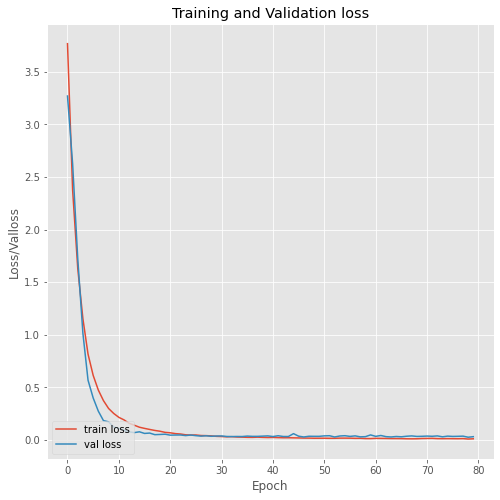

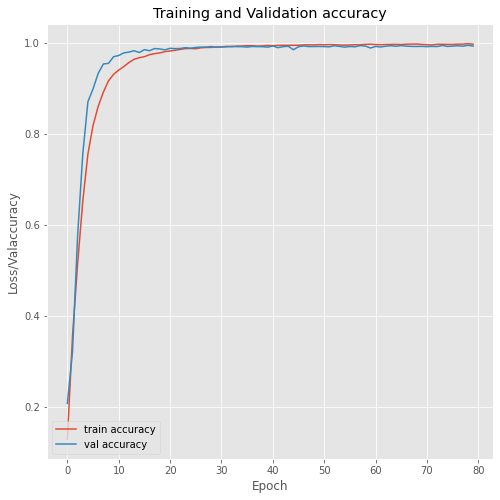

In [56]:
evaluation_vis(History2, 'loss',eps)
evaluation_vis(History2, 'accuracy',eps)

In [57]:
x_test2 = tf.cast(x_test, tf.float32)
yhat_class2 = model2.predict_classes(x_test2, verbose=0)

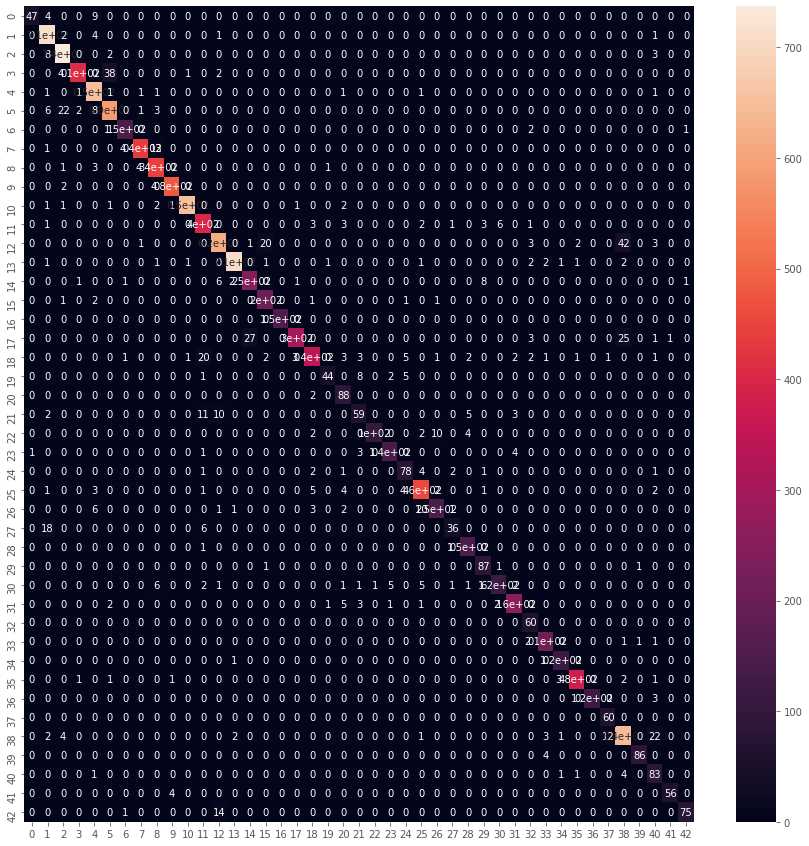

In [58]:
conf_matrix(y_test, yhat_class2)

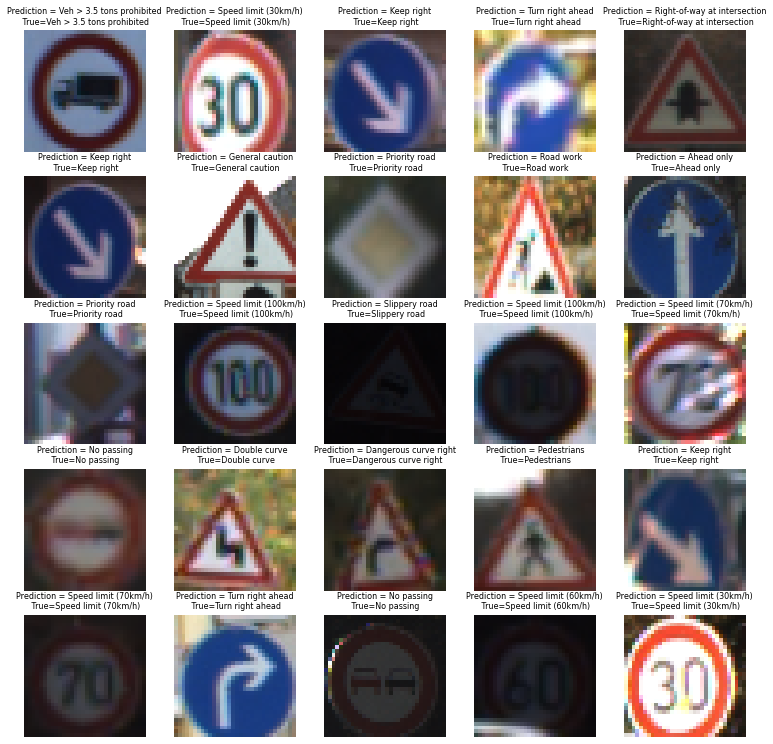

In [59]:
img_rec(x_test, yhat_class2, y_test, classes)


In [61]:
yhat_probs = model2.predict(x_test, verbose=0)
yhat_classes = model2.predict_classes(x_test, verbose=0)
eval_metrics(yhat_classes, y_test)

Accuracy: 0.943785
              precision    recall  f1-score   support

           0       0.98      0.78      0.87        60
           1       0.94      0.99      0.96       720
           2       0.96      0.98      0.97       750
           3       0.99      0.91      0.95       450
           4       0.95      0.99      0.97       660
           5       0.93      0.93      0.93       630
           6       0.98      0.97      0.98       150
           7       0.99      0.97      0.98       450
           8       0.94      0.98      0.96       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.90      0.95      0.93       420
          12       0.95      0.90      0.92       690
          13       0.99      0.98      0.99       720
          14       0.90      0.93      0.91       270
          15       0.89      0.97      0.93       210
          16       1.00      1.00      1.00       150
        

Pre-processing again data. Resizing training,test,validation images to 48x48x3.

In [62]:
print("Data Loading for third model...")

list_images2 = []
output2 = []
for dir in os.listdir(data_dir):
    if dir == '.DS_Store':
        continue

    inner_dir = os.path.join(data_dir, dir)
    csv_file = pd.read_csv(os.path.join(inner_dir, "GT-" + dir + '.csv'),
                           sep=';')
    for row in csv_file.iterrows():
        img_path2 = os.path.join(inner_dir, row[1].Filename)
        img2 = plt.imread(img_path2)
        img2 = img2[row[1]['Roi.X1']:row[1]['Roi.X2'], row[1]['Roi.Y1']:row[1]
                    ['Roi.Y2'], :]
        img2 = resize_cv(img2, 48)
        list_images2.append(img2)
        output2.append(row[1].ClassId)

Data Loading for third model...


In [63]:
x2 = np.asarray(list_images2)
y2 = np.asarray(output2)
x2, y2 = shuffle(x2, y2)

x_t2, y_t2 = test_images('/content/GTSRB/Final_Test/Images/GT-final_test.csv',48)
x_test2 = np.asarray(x_t2)
y_test2 = np.asarray(y_t2)
x2.shape
split_size2 = int(x2.shape[0] * 0.75)
x_train2, x_val2 = x2[:split_size2], x2[split_size2:]
y_train2, y_val2 = y2[:split_size2], y2[split_size2:]

print("Training set size:", len(x_train2))
print("Validation set size:", len(x_val2))
print("Test set size:", len(x_test2))

Training set size: 29406
Validation set size: 9803
Test set size: 12630


Training and Visualizing MicronNet model. Trained on 60 epochs, batch_size =128.

In [65]:
print('MicronNet training begins...')
eps=80
model3 = MicronNet(48, 48, 3)

History3 = model3.fit(x_train2,
                    y_train2,
                    batch_size=500,
                    epochs=eps,
                    verbose=1,
                    validation_data=(x_val2, y_val2))


MicronNet training begins...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 1)         4         
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 1)         4         
_________________________________________________________________
activation_15 (Activation)   (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 44, 44, 29)        754       
_________________________________________________________________
batch_normalization_13 (Batc (None, 44, 44, 29)        116       
_________________________________________________________________
activation_16 (Activation)   (None, 44, 44, 29)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooli

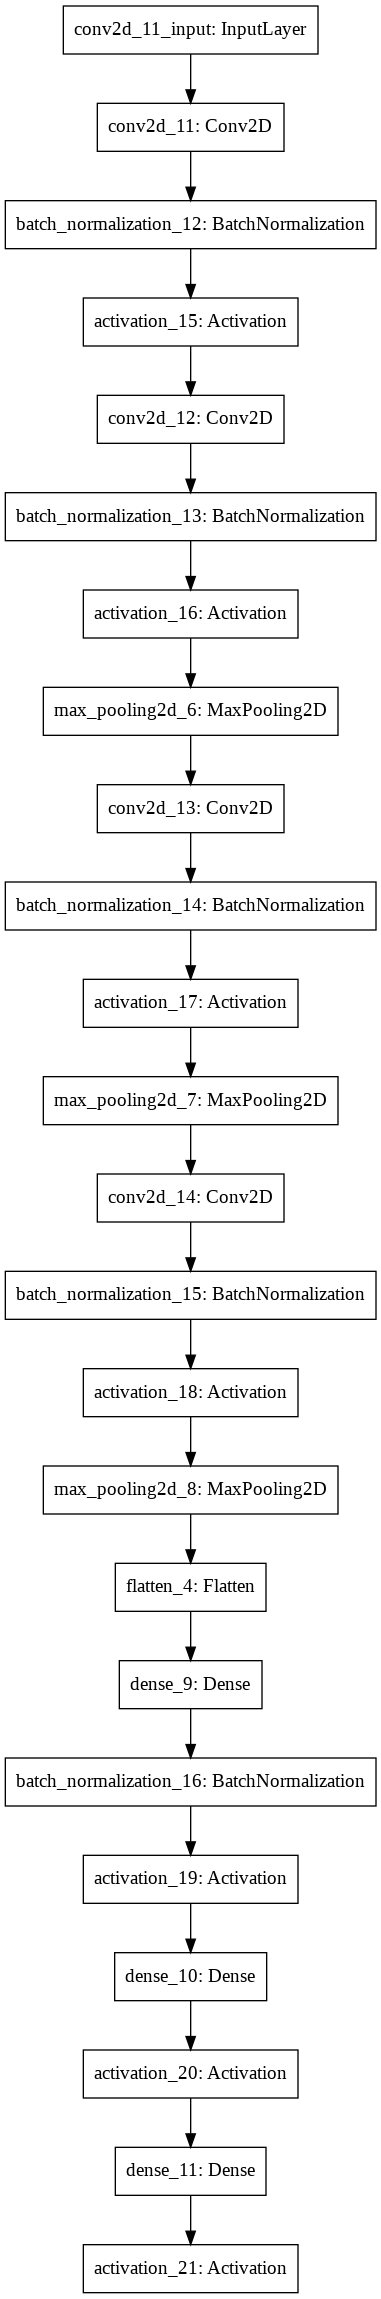

In [66]:
tf.keras.utils.plot_model(
    model3,
    to_file="model3.png",)

Model Evaluation. Test accuracy 95,7%

In [67]:
score2 = model3.evaluate(x_test2, y_test2, verbose=0)
print("Test Loss: {}".format(score2[0]))
print("Test Accuracy: {}".format(score2[1]))

Test Loss: 0.231536865234375
Test Accuracy: 0.957640528678894


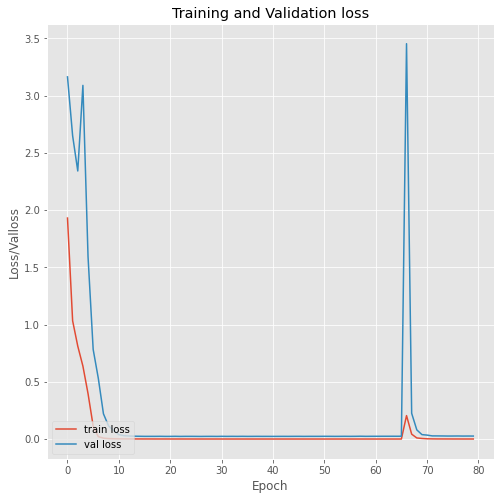

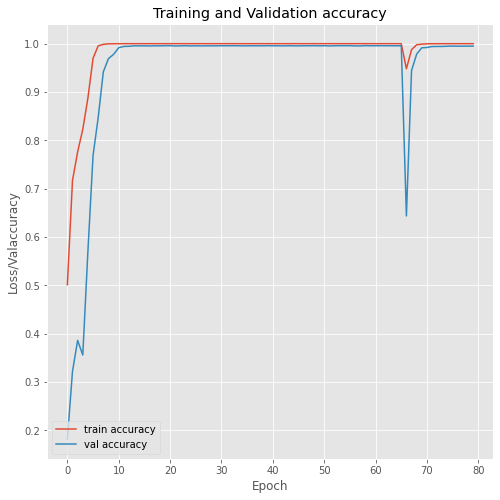

In [68]:
evaluation_vis(History3, 'loss',eps)
evaluation_vis(History3, 'accuracy',eps)

In [69]:
x_test3 = tf.cast(x_test2, tf.float32)

In [70]:
yhat_class3 = model3.predict_classes(x_test3, verbose=0)

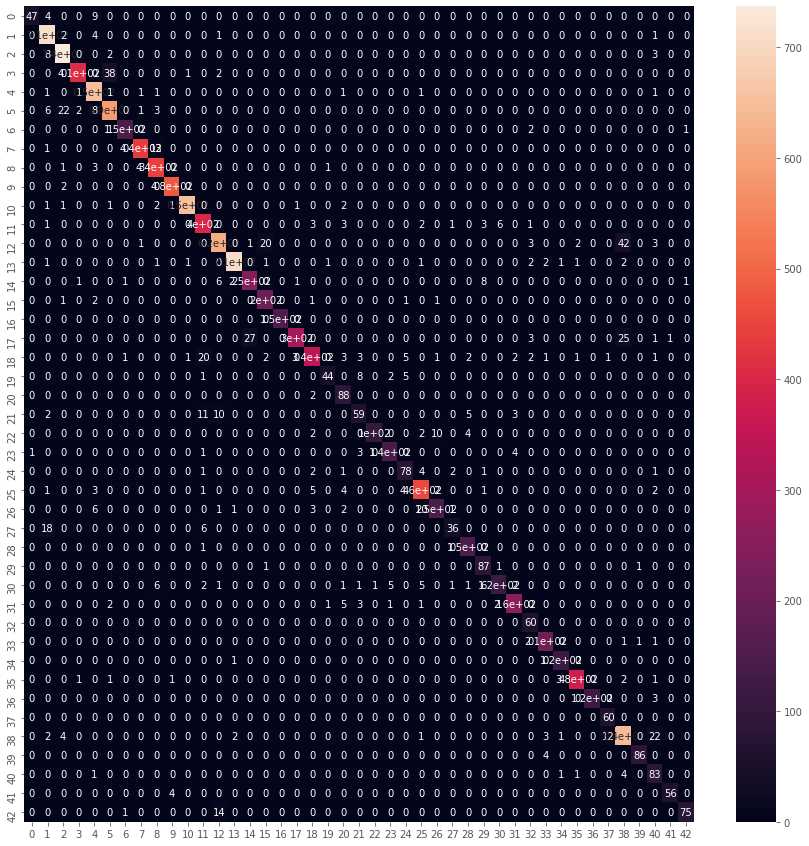

In [71]:
conf_matrix(y_t2, yhat_class2)


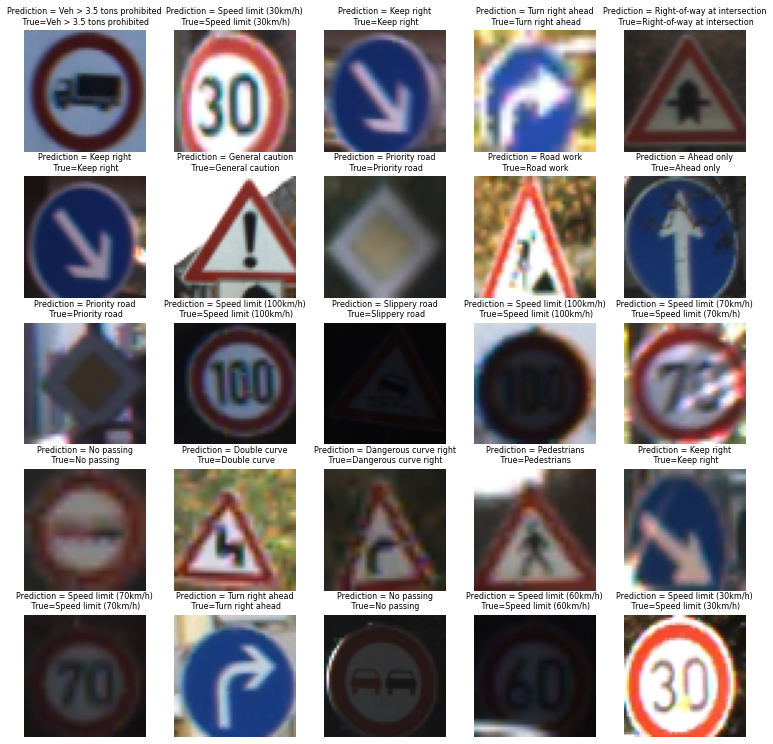

In [72]:
img_rec(x_test2, yhat_class2, y_t2, classes)


In [74]:
yhat_probs = model3.predict(x_test3, verbose=0)
yhat_classes = model3.predict_classes(x_test3, verbose=0)
eval_metrics(yhat_classes, y_t2)

Accuracy: 0.957641
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      1.00      0.98       720
           2       0.99      1.00      0.99       750
           3       0.98      0.98      0.98       450
           4       0.98      0.99      0.98       660
           5       0.95      0.97      0.96       630
           6       1.00      0.81      0.89       150
           7       0.94      0.94      0.94       450
           8       0.95      0.98      0.97       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.97      0.98      0.97       420
          12       0.91      1.00      0.95       690
          13       0.99      0.99      0.99       720
          14       1.00      0.89      0.94       270
          15       0.99      0.94      0.97       210
          16       0.99      1.00      1.00       150
        